In [2]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack
import fitsio
# from astropy.io import fits

In [3]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [4]:
cat = Table.read('/Users/rongpu/Documents/Data/dr9_tests/outliers/coadd_stats.fits')

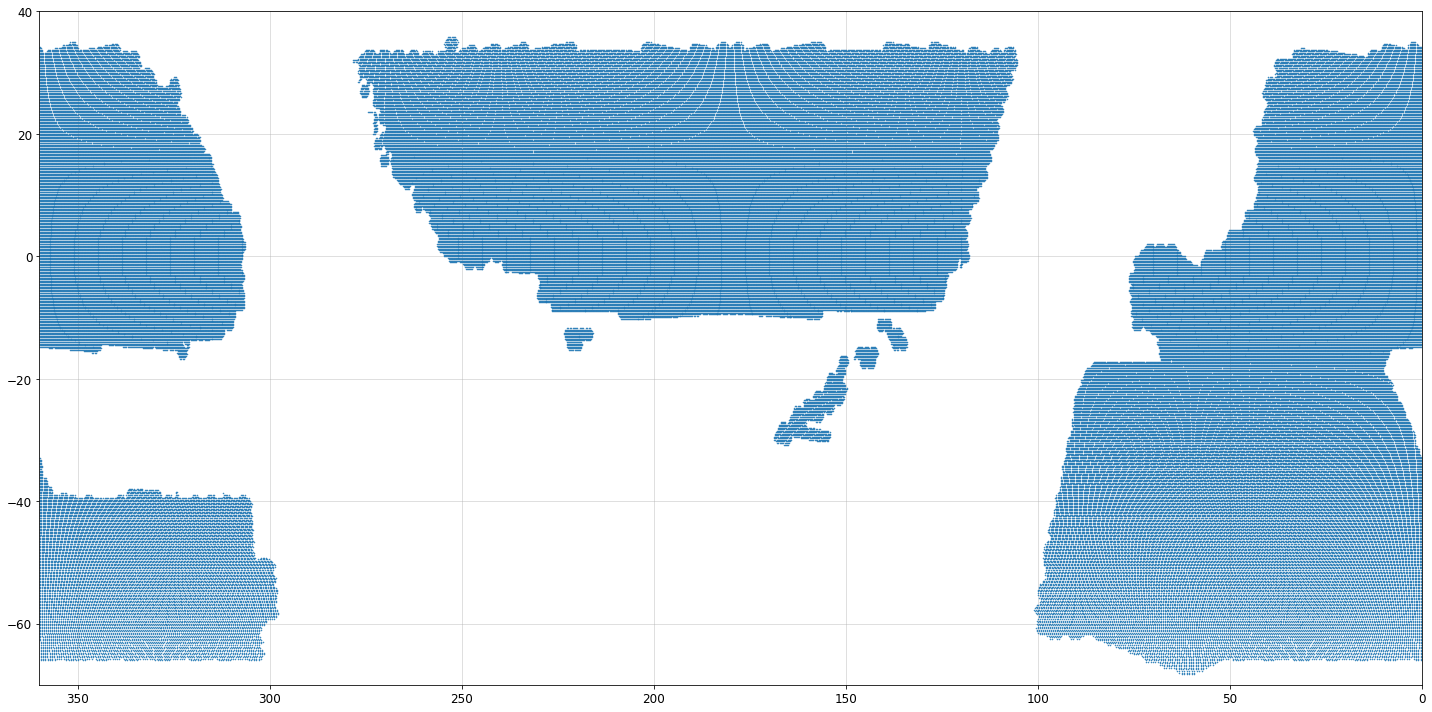

In [5]:
mask = np.ones(len(cat), dtype=bool)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cat['RA'][mask], cat['DEC'][mask], '.', ms=1, alpha=1)
plt.axis([360, 0, -70, 40])
ax.grid(alpha=0.5)
plt.tight_layout()
# plt.savefig('/Users/rongpu/Downloads/corrupt/r.png')
plt.show()

0.14185434217390056 34536


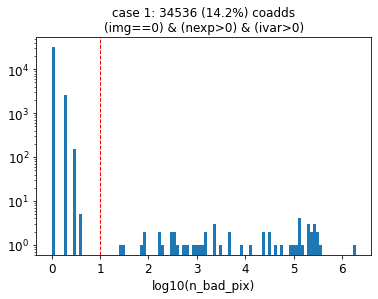

In [30]:
mask = cat['npix_case1_r']>0
print(np.sum(mask)/len(mask), np.sum(mask))

plt.hist(np.log10(cat['npix_case1_r'][mask]), 100, log=True)
plt.xlabel('log10(n_bad_pix)')
plt.title('case 1: {} ({:.1f}%) coadds\n(img==0) & (nexp>0) & (ivar>0)'.format(np.sum(mask), np.sum(mask)/len(mask)*100))
plt.axvline(1, ls='--', color='r', lw=1)
plt.show()

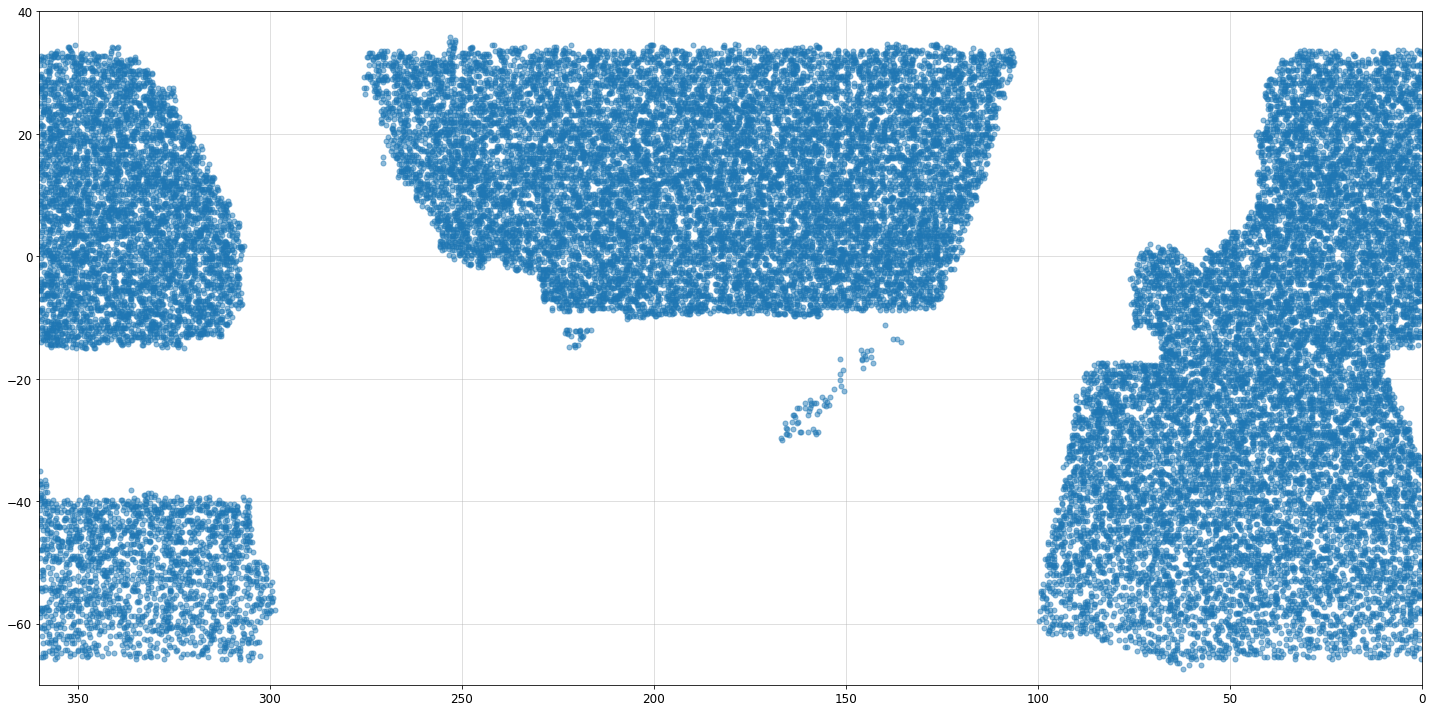

55


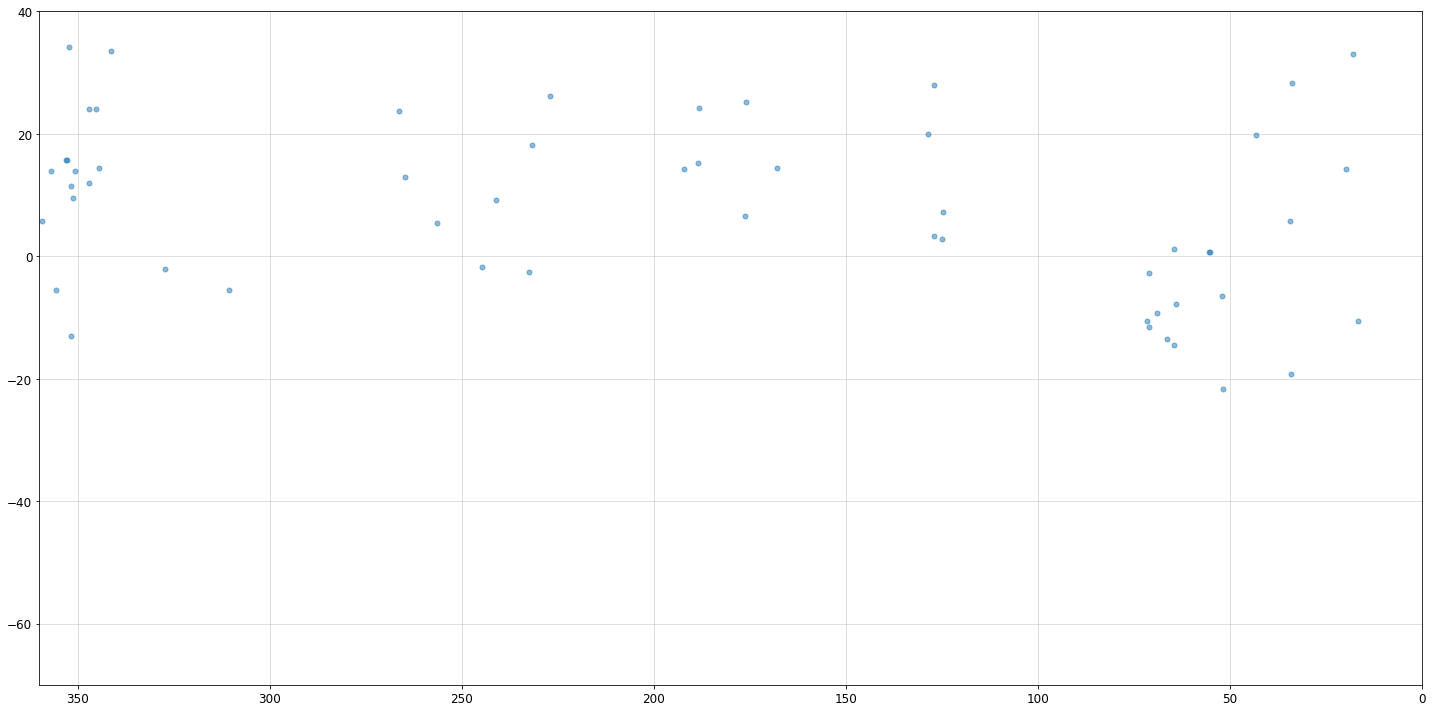

In [8]:
mask = cat['npix_case1_r']>0
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cat['RA'][mask], cat['DEC'][mask], '.', ms=10, alpha=.5)
plt.axis([360, 0, -70, 40])
ax.grid(alpha=0.5)
plt.tight_layout()
# plt.savefig('/Users/rongpu/Downloads/corrupt/r.png')
plt.show()

mask = cat['npix_case1_r']>10
print(np.sum(mask))
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cat['RA'][mask], cat['DEC'][mask], '.', ms=10, alpha=.5)
plt.axis([360, 0, -70, 40])
ax.grid(alpha=0.5)
plt.tight_layout()
# plt.savefig('/Users/rongpu/Downloads/corrupt/r.png')
plt.show()

0.9174282533958211 223358


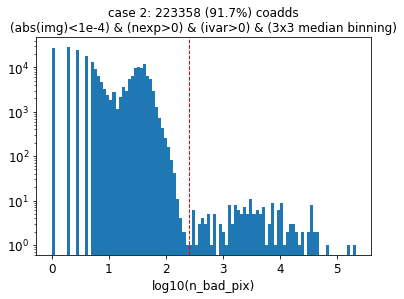

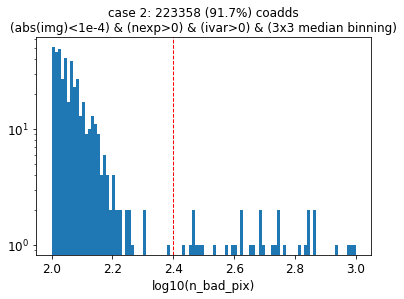

In [35]:
mask = cat['npix_case2_r']>0
print(np.sum(mask)/len(mask), np.sum(mask))

plt.hist(np.log10(cat['npix_case2_r'][mask]), 100, log=True)
plt.xlabel('log10(n_bad_pix)')
plt.title('case 2: {} ({:.1f}%) coadds\n(abs(img)<1e-4) & (nexp>0) & (ivar>0) & (3x3 median binning)'.format(np.sum(mask), np.sum(mask)/len(mask)*100))
plt.axvline(2.4, ls='--', color='r', lw=1)
plt.show()

plt.hist(np.log10(cat['npix_case2_r'][mask]), 100, range=(2, 3), log=True)
plt.xlabel('log10(n_bad_pix)')
plt.title('case 2: {} ({:.1f}%) coadds\n(abs(img)<1e-4) & (nexp>0) & (ivar>0) & (3x3 median binning)'.format(np.sum(mask), np.sum(mask)/len(mask)*100))
plt.axvline(2.4, ls='--', color='r', lw=1)
plt.show()

171


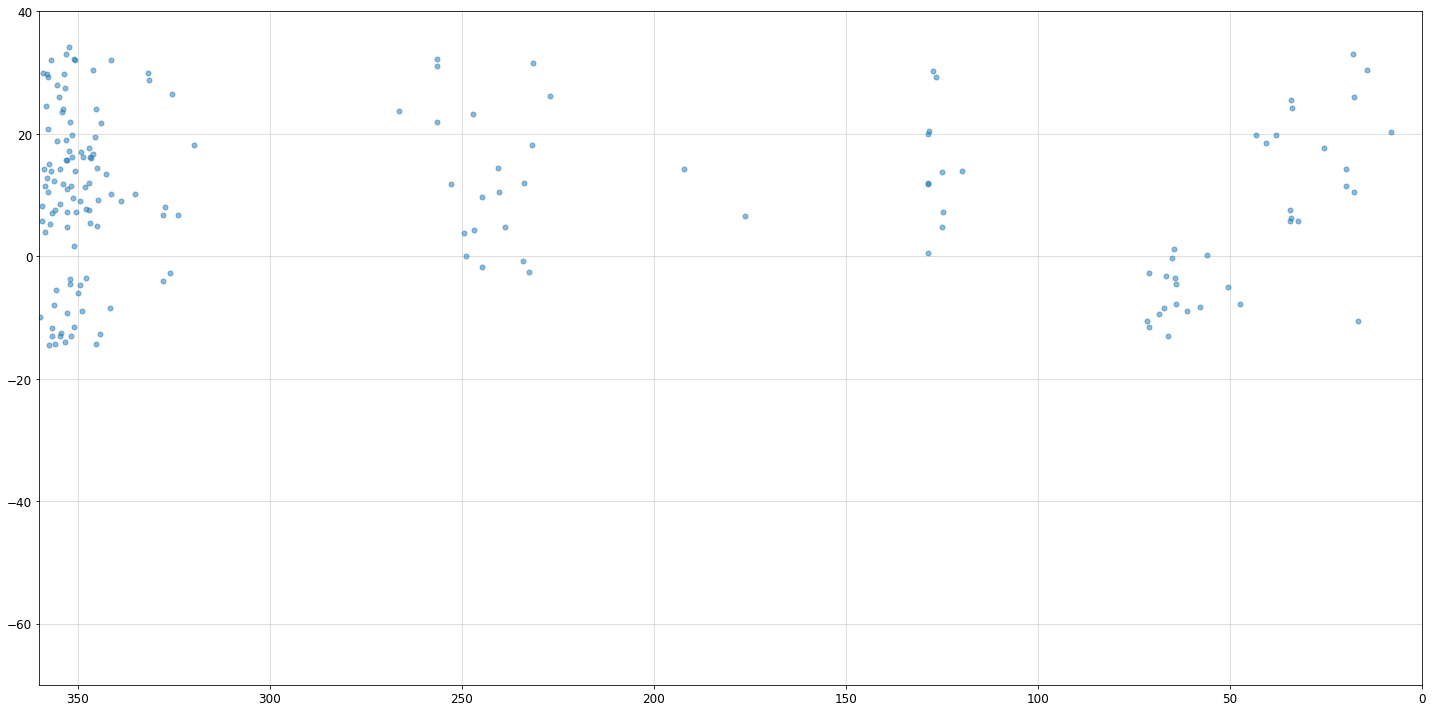

In [10]:
mask = cat['npix_case2_r']>10**2.4
print(np.sum(mask))

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cat['RA'][mask], cat['DEC'][mask], '.', ms=10, alpha=.5)
plt.axis([360, 0, -70, 40])
ax.grid(alpha=0.5)
plt.tight_layout()
# plt.savefig('/Users/rongpu/Downloads/corrupt/r.png')
plt.show()

0.049929968249534835 12156


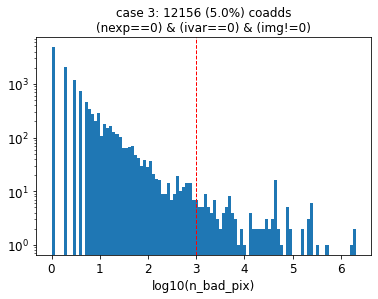

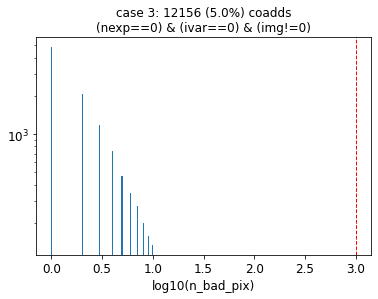

In [33]:
mask = cat['npix_case3_r']>0
print(np.sum(mask)/len(mask), np.sum(mask))

plt.hist(np.log10(cat['npix_case3_r'][mask]), 100, log=True)
plt.xlabel('log10(n_bad_pix)')
plt.title('case 3: {} ({:.1f}%) coadds\n(nexp==0) & (ivar==0) & (img!=0)'.format(np.sum(mask), np.sum(mask)/len(mask)*100))
plt.axvline(3, ls='--', color='r', lw=1)
plt.show()

plt.hist(np.log10(cat['npix_case3_r'][mask]), 100, range=(0, 1), log=True)
plt.xlabel('log10(n_bad_pix)')
plt.title('case 3: {} ({:.1f}%) coadds\n(nexp==0) & (ivar==0) & (img!=0)'.format(np.sum(mask), np.sum(mask)/len(mask)*100))
plt.axvline(3, ls='--', color='r', lw=1)
plt.show()

/Users/rongpu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


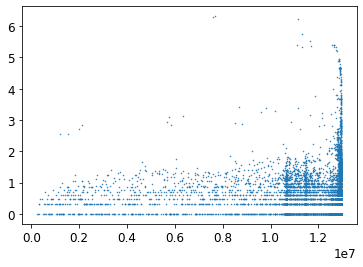

In [12]:
plt.plot(cat['npix_obs_r'], np.log10(cat['npix_case3_r']), '.', ms=1)
plt.show()

12156


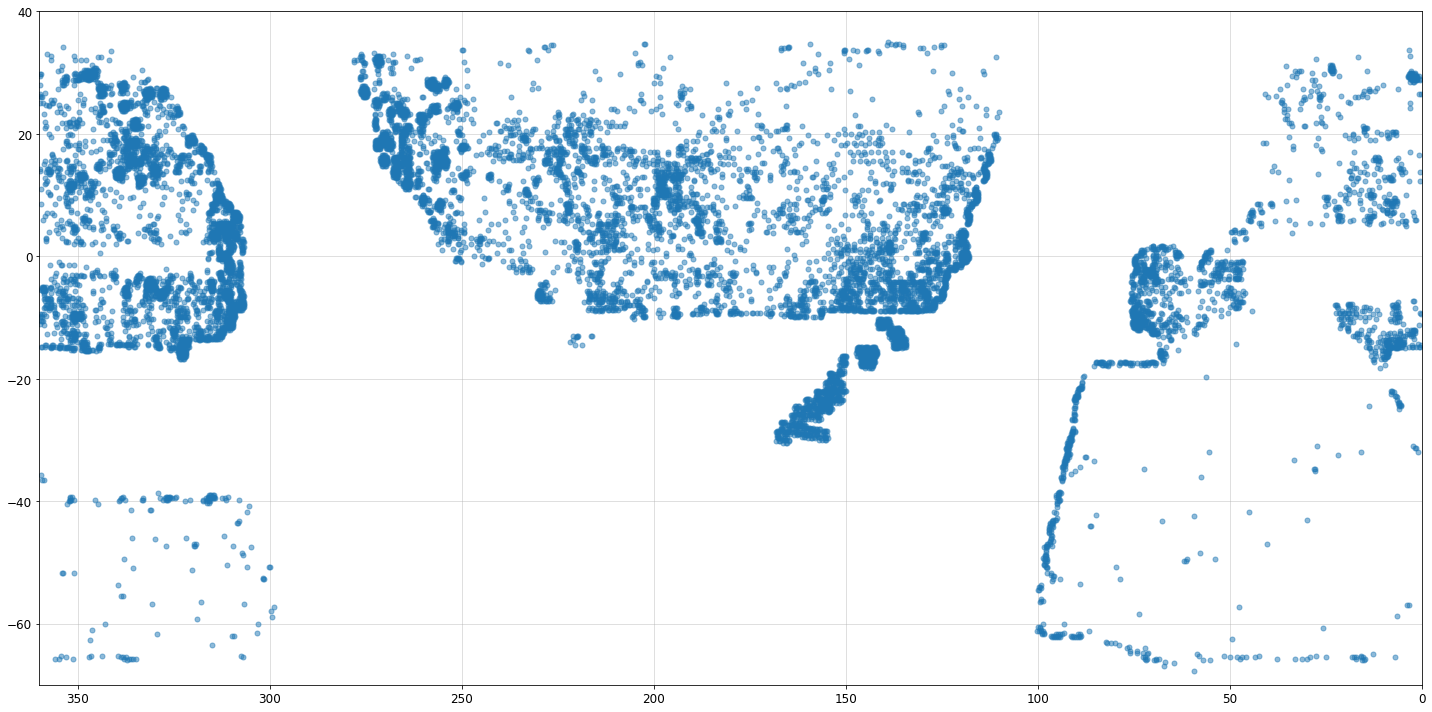

In [13]:
mask = cat['npix_case3_r']>0
print(np.sum(mask))

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cat['RA'][mask], cat['DEC'][mask], '.', ms=10, alpha=.5)
plt.axis([360, 0, -70, 40])
ax.grid(alpha=0.5)
plt.tight_layout()
# plt.savefig('/Users/rongpu/Downloads/corrupt/r.png')
plt.show()

131


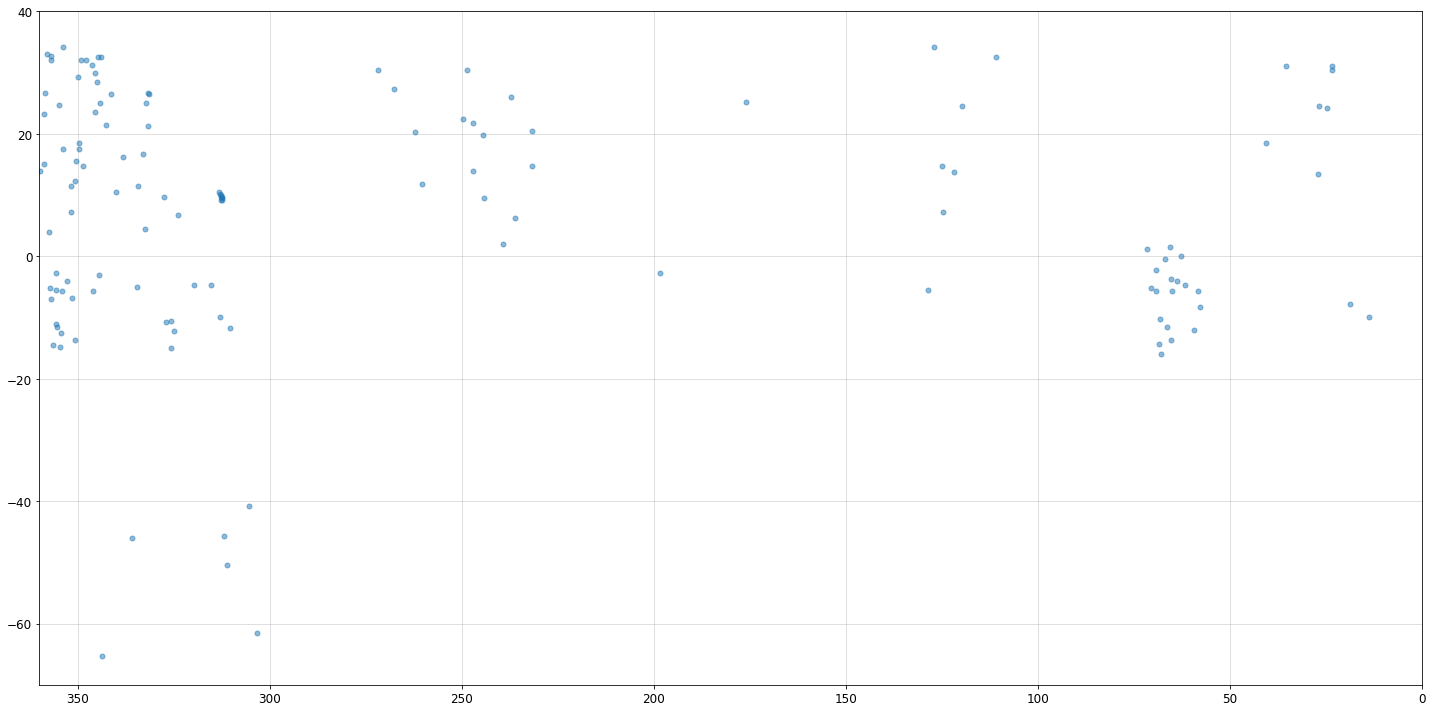

In [14]:
mask = cat['npix_case3_r']>1e3
print(np.sum(mask))

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cat['RA'][mask], cat['DEC'][mask], '.', ms=10, alpha=.5)
plt.axis([360, 0, -70, 40])
ax.grid(alpha=0.5)
plt.tight_layout()
# plt.savefig('/Users/rongpu/Downloads/corrupt/r.png')
plt.show()

In [15]:
idx = np.where(mask)[0]
print(len(idx))
if len(idx)>200:
    idx = np.random.choice(idx, size=200, replace=False)
t = Table()
t['RA'] = cat['RA'][idx]
t['DEC'] = cat['DEC'][idx]
t.write('/Users/rongpu/Downloads/visual_inspection_r.txt', format='ascii.no_header', overwrite=True)

131
